2025-09-08 13:37:12.563162: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-08 13:37:12.563193: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-08 13:37:12.563196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1757318832.563499  707606 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1757318832.563880  707606 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the firs

Epoch 1/10


2025-09-08 13:37:13.384188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 869ms/step - loss: 0.1009 - val_loss: 0.0013
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 835ms/step - loss: 6.7127e-04 - val_loss: 8.8080e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 873ms/step - loss: 5.8779e-04 - val_loss: 7.1155e-04
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 891ms/step - loss: 4.8953e-04 - val_loss: 7.8616e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 859ms/step - loss: 5.0983e-04 - val_loss: 7.7776e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 894ms/step - loss: 4.5105e-04 - val_loss: 6.9749e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 842ms/step - loss: 4.6337e-04 - val_loss: 7.3420e-04
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 846ms/step - loss: 3.9888e-04 - val_loss: 9.0622e-04
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 889ms/step - loss: 5.5403e-04 - val_loss: 6.0921e-04
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 887ms/step - loss: 3.6077e-04 - val_loss: 8.6288e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

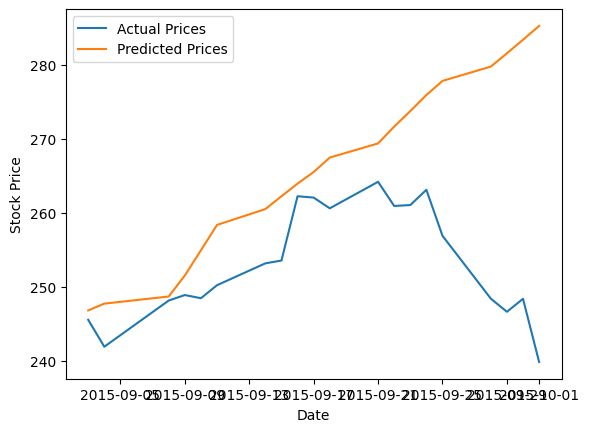

Day 1: Actual: 245.570007, Predicted: 246.83425903320312
Day 2: Actual: 241.929993, Predicted: 247.75271606445312
Day 3: Actual: 248.169998, Predicted: 248.71380615234375
Day 4: Actual: 248.910004, Predicted: 251.5471649169922
Day 5: Actual: 248.479996, Predicted: 254.95509338378906
Day 6: Actual: 250.240005, Predicted: 258.37908935546875
Day 7: Actual: 253.190002, Predicted: 260.5130920410156
Day 8: Actual: 253.570007, Predicted: 262.2513732910156
Day 9: Actual: 262.25, Predicted: 263.9517822265625
Day 10: Actual: 262.070007, Predicted: 265.52362060546875
Day 11: Actual: 260.619995, Predicted: 267.47442626953125
Day 12: Actual: 264.200012, Predicted: 269.38079833984375
Day 13: Actual: 260.940002, Predicted: 271.65435791015625
Day 14: Actual: 261.059998, Predicted: 273.7413330078125
Day 15: Actual: 263.119995, Predicted: 275.92010498046875
Day 16: Actual: 256.910004, Predicted: 277.82379150390625
Day 17: Actual: 248.429993, Predicted: 279.7521057128906
Day 18: Actual: 246.649994, Predi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('Tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2. Preprocess the data (normalize)
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")


In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN
# from sklearn.model_selection import train_test_split

# # 1. Load the dataset
# df = pd.read_csv('/content/tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # 2. Preprocess the data (normalize)
# data = df[['Close']].values
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data)

# # 3. Create sequences for the RNN
# def create_sequences(data, sequence_length):
#     X, y = [], []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i + sequence_length])
#         y.append(data[i + sequence_length])
#     return np.array(X), np.array(y)

# sequence_length = 120
# X, y = create_sequences(scaled_data, sequence_length)

# # 4. Split the data into train and test sets
# split_index = int(len(X) * 0.8)
# X_train, y_train = X[:split_index], y[:split_index]
# X_test, y_test = X[split_index:], y[split_index:]

# # 5. Build the RNN model
# model = Sequential()
# model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
# model.add(Dense(1))  # Output layer for predicting the stock price

# model.compile(optimizer='adam', loss='mean_squared_error')

# # 6. Train the model on the training set
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # 7. Predict for the next 20 days
# # Use the last 60 days from the training set to predict the next 20 days
# predictions = []
# input_sequence = scaled_data[split_index - sequence_length:split_index]

# for _ in range(20):  # Predict for the next 20 days
#     input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
#     predicted_price = model.predict(input_sequence)

#     predictions.append(predicted_price[0][0])  # Save predicted price

#     # Reshape the predicted price to match input shape (1, 1, 1)
#     predicted_price = np.reshape(predicted_price, (1, 1, 1))

#     # Shift the input_sequence and append the predicted price
#     input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

# # 8. Inverse transform the predicted prices
# predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# # 9. Compare with the actual prices
# actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

# # 10. Plot the results
# plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
# plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# # Print actual and predicted prices for the next 20 days
# for i in range(20):
#     print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")
